In [1]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Baixar dados
data = yf.download('PETR4.SA', start='2020-01-01', end=datetime.datetime.today(), progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,11.298738,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,11.206727,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,11.339221,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,11.295057,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,11.225129,48215600
...,...,...,...,...,...,...
2023-12-27,37.320000,37.430000,37.130001,37.360001,37.360001,19588500
2023-12-28,37.230000,37.360001,37.040001,37.240002,37.240002,21421900
2024-01-02,37.439999,37.889999,37.400002,37.779999,37.779999,24043800


In [3]:
# Criar DataFrame para sinais
data_signal = pd.DataFrame(index=data.index)
data_signal['price'] = data['Close']
data_signal['daily_difference'] = data_signal['price'].diff()


In [4]:
# Gerar sinais de compra e venda
data_signal['signal'] = np.where(data_signal['daily_difference'] > 0, 1.0, 0.0)
data_signal['positions'] = data_signal['signal'].diff()


In [5]:
# Exemplo
initial_capital = 1000.0

In [6]:
# Criar DataFrames para posições e portfólio
positions = pd.DataFrame(index=data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=data_signal.index).fillna(0.0)


In [7]:
# Preencher DataFrames
positions['PETR4'] = data_signal['signal']
portfolio['positions'] = (positions.multiply(data_signal['price'], axis=0)).cumsum()
portfolio['cash'] = initial_capital - (positions.diff().multiply(data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

In [8]:
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

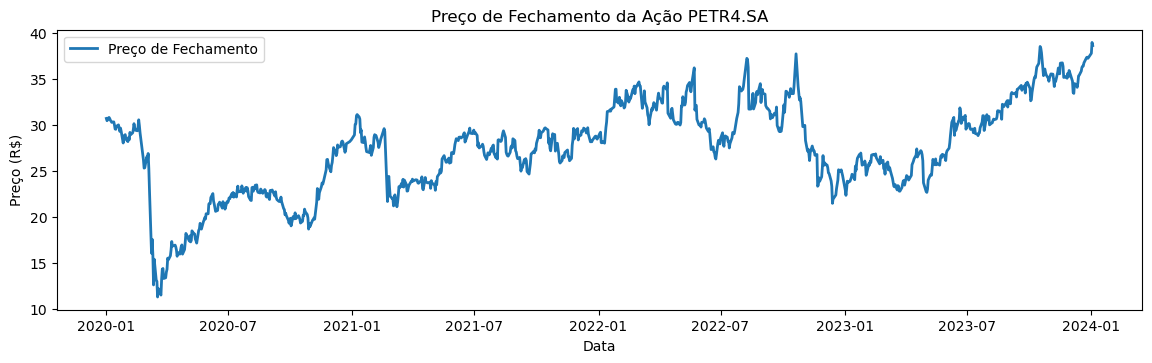

In [27]:
# Gráfico de Preço da Ação
plt.figure(figsize=(14, 8)) 
plt.subplot(2, 1, 1)
plt.plot(data_signal['price'], label='Preço de Fechamento', linewidth=2)
plt.title('Preço de Fechamento da Ação PETR4.SA')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()

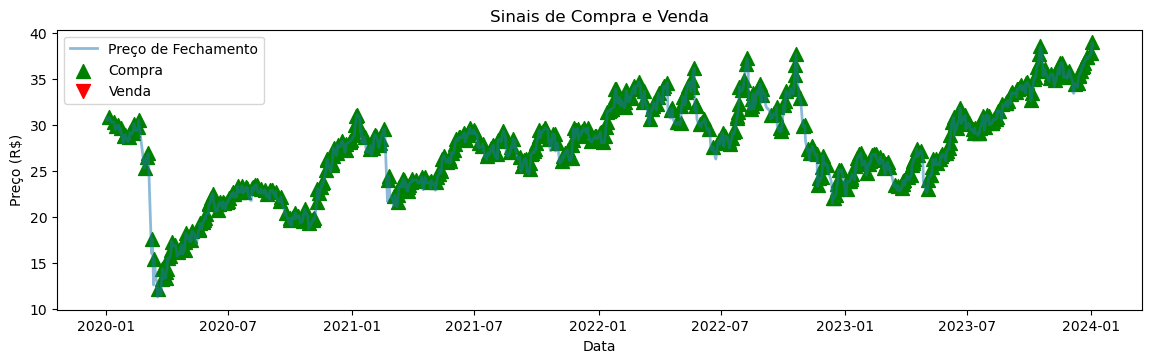

In [26]:
# Gráfico de Sinais de Compra e Venda
plt.figure(figsize=(14, 8))  # Ajuste as dimensões conforme necessário
plt.subplot(2, 1, 2)
plt.plot(data_signal['price'], label='Preço de Fechamento', linewidth=2, alpha=0.5)  # Adiciona transparência (alpha)
plt.scatter(data_signal[data_signal['signal'] == 1.0].index, data_signal['price'][data_signal['signal'] == 1.0], marker='^', s=100, color='g', label='Compra')
plt.scatter(data_signal[data_signal['signal'] == -1.0].index, data_signal['price'][data_signal['signal'] == -1.0], marker='v', s=100, color='r', label='Venda')
plt.title('Sinais de Compra e Venda')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.legend()

In [11]:
# Mostrar gráficos
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

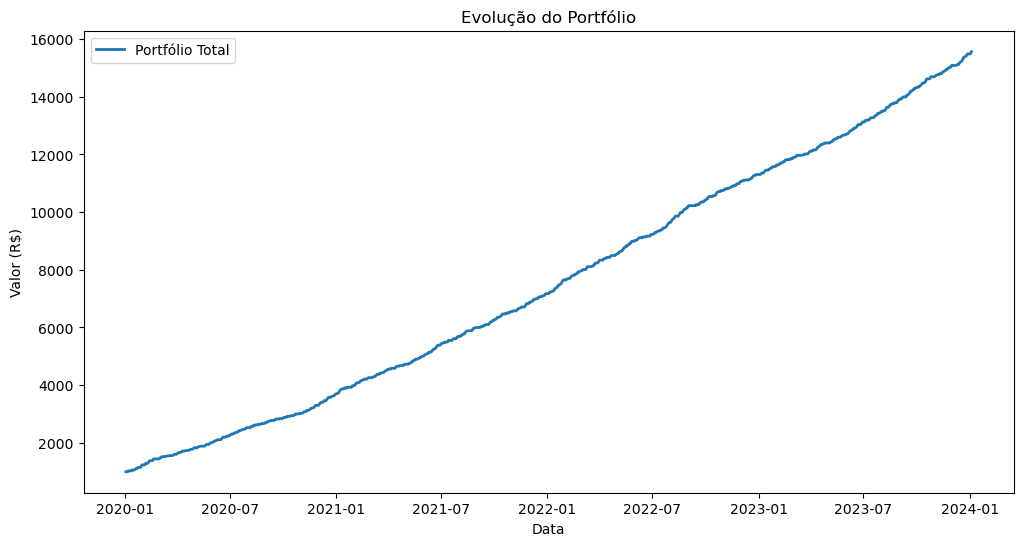

In [14]:
# Gráfico de Evolução do Portfólio
plt.figure(figsize=(12, 6))
plt.plot(portfolio['total'], label='Portfólio Total', linewidth=2)
plt.title('Evolução do Portfólio')
plt.xlabel('Data')
plt.ylabel('Valor (R$)')
plt.legend()
plt.show()

In [16]:
portifolio

,positions,cash,total
Date,,,
2020-01-02,0.000000,NaN,NaN
2020-01-03,0.000000,1000.000000,1000.000000
2020-01-06,30.809999,969.190001,1000.000000
2020-01-07,30.809999,999.880001,1030.690001
2020-01-08,30.809999,999.880001,1030.690001
...,...,...,...
2023-12-27,14476.209997,968.420005,15444.630002
2023-12-28,14476.209997,1005.660007,15481.870004
2024-01-02,14513.989996,967.880008,15481.870004
